In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
concrete = pd.read_csv("concrete.csv")  
concrete.shape

(1030, 9)

In [3]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# #Attributes or feature meaning# #

#Cement (cement) --quantitative --kg in a m3 mixture --Input Variable
#####the amount of cement in the mixture this is a basic element as it makes the paste of the concrete

#Blast Furnace Slag (slag) --quantitative --kg ina m3 mixture --Input Variable
#####material that can replace the some of the cement in the concrete mixture to improve the qulaity (is an additive for improvemet)

#Fly Ash (ash) --quantitative --kg ina m3 mixture --Input Variable
#####material that can replace the some of the cement in the concrete mixture to improve the qulaity (is an additive for improvemet)

#Water (water) --quantitative --kg in a m3 mixture --Input Variable
######the amount of water in the mixture this is a basic element as it makes the paste of concrete

#Superplasticizer (superplastic) --quantitative --kg in a m3 mixture --Input Variable
#####material that can replace the some of the cement in the concrete mixture to improve the qulaity (is an additive for improvemet)

#Coarse Aggregate (coarseagg) --quantitative --kg in a m3 mixture --Input Variable
#######the aggregate that form 75% of the concrete mixture (basic element) it can be coarese of fine or both

#Fine Aggregate (fineagg) --quantitative --kg in a m3 mixture --Input Variable
######the aggregate that form 75% of the concrete mixture (basic element) it can be fine or coarse or both


#Age(age) --quantitative --Day (1~365) --Input Variable
######the age of the concrete mixture from the time it has been prepared

#Concrete compressive strength(strength) --quantitative --MPa --Output Variable
#####the target variable that is used to indicate the strength of the concrete under the compression laod test


# #Missing values- Data type - contineous variables- duplicates- statistical moments of the features and target

In [4]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


####all variables are of numerical types

####We do not have any missing values, however lets see the unique values to get more insight it to wired values

In [5]:
concrete.columns
for col in concrete.columns:
    print(col,': number of unique entries = ',concrete[col].nunique())

cement : number of unique entries =  278
slag : number of unique entries =  185
ash : number of unique entries =  156
water : number of unique entries =  195
superplastic : number of unique entries =  111
coarseagg : number of unique entries =  284
fineagg : number of unique entries =  302
age : number of unique entries =  14
strength : number of unique entries =  845


#the number of unique entries in age is 14: Is it worth it to keep it as a contineous variable??
#Would it be better to convert it to a catergrical data type
#I will come back to this later

In [6]:
#lets check if we have duplicate rows
duplicate = concrete.duplicated(subset=None, keep='first')#first means print all duplicate rows except their first occurance time
print(len(duplicate))
duplicate_index=[]
for i in range(len(duplicate)):
    if duplicate[i]!=False:
        #print(i,'is the dupliacte index')
        #print(concrete.loc[[i]])
        duplicate_index.append(i)
        #print("")
    #else:
        #print('No duplicates')
print('duplicate row index',duplicate_index)  
print(len(duplicate_index))
print('the new number of the rows in concrete data frame with out the duplicate rows =',len(duplicate)-len(duplicate_index))

1030
duplicate row index [278, 298, 400, 420, 463, 468, 482, 493, 517, 525, 527, 576, 577, 604, 733, 738, 766, 830, 880, 884, 892, 933, 943, 967, 992]
25
the new number of the rows in concrete data frame with out the duplicate rows = 1005


In [7]:
concrete.drop_duplicates(subset =None, 
                     keep = 'first', inplace = True)

In [8]:
concrete.shape

(1005, 9)

In [9]:
Describe=concrete.describe()
DescribeT=Describe.T

In [10]:
#BankFull.columns
Intg_col =['cement','slag','ash', 'water', 'superplastic', 'coarseagg',
       'fineagg','age','strength']
#print(BankFull[Intg_col].median())
DescribeT['median'] = concrete[Intg_col].median()

In [11]:
DescribeT

,count,mean,std,min,25%,50%,75%,max,median
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0,265.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4,20.0
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1,0.0
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0,185.7
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2,6.1
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0,968.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6,780.0
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0,28.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6,33.8


#In the dataframe above we can see the following:

#Cement density is in the range [102, 350] kg/m3, the mean and the median are around only 3% off, little skewness

#slag density is in the range [0,359.4] kg/m3, the mean and median are 70 % off, the zero here does make sense because it is an optional additive to improve the qulaity of the cement (according to experts), huge skewness

#Ash density is in the range [0,200] kg/m3, the median is zero, but again the zero here does make sense because it is an optional additive to improve the qulaity of the cement (according to experts)

#water density is in the range [122,247] kg/m3, the median and the mean are 2% off, nearly normal distribution

#superplastic density is in the range [0,32] kg/m3, the median is zero and the mean is 6,  but again the zero here does make sense because it is an optional additive to improve the qulaity of the cement (according to experts)

#coarseagg density is in the range [801,1145] kg/m3, the mean and median are only 1 % off, normal distribution

#fineagg density is in the range [594,993] kh/m3, the mean and median are also around 1% off, normal distribution

#Age in days is in the range [1,365] days the mean is 45 days and the median is 28 days

#strenght the target value is in the range [2.3,82.6] Mpa, the medain and the mean are very close, normal distribution

####we do not have negative numbers as well

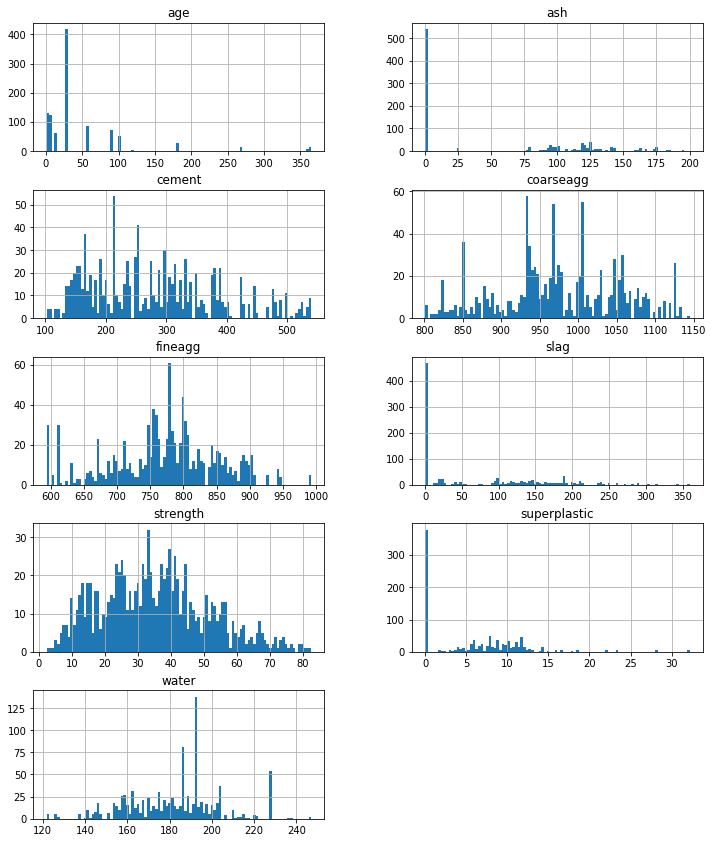

In [12]:
col=concrete.columns
concrete[col].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

#these histograms agree with the observations we have drwan from the Describetable

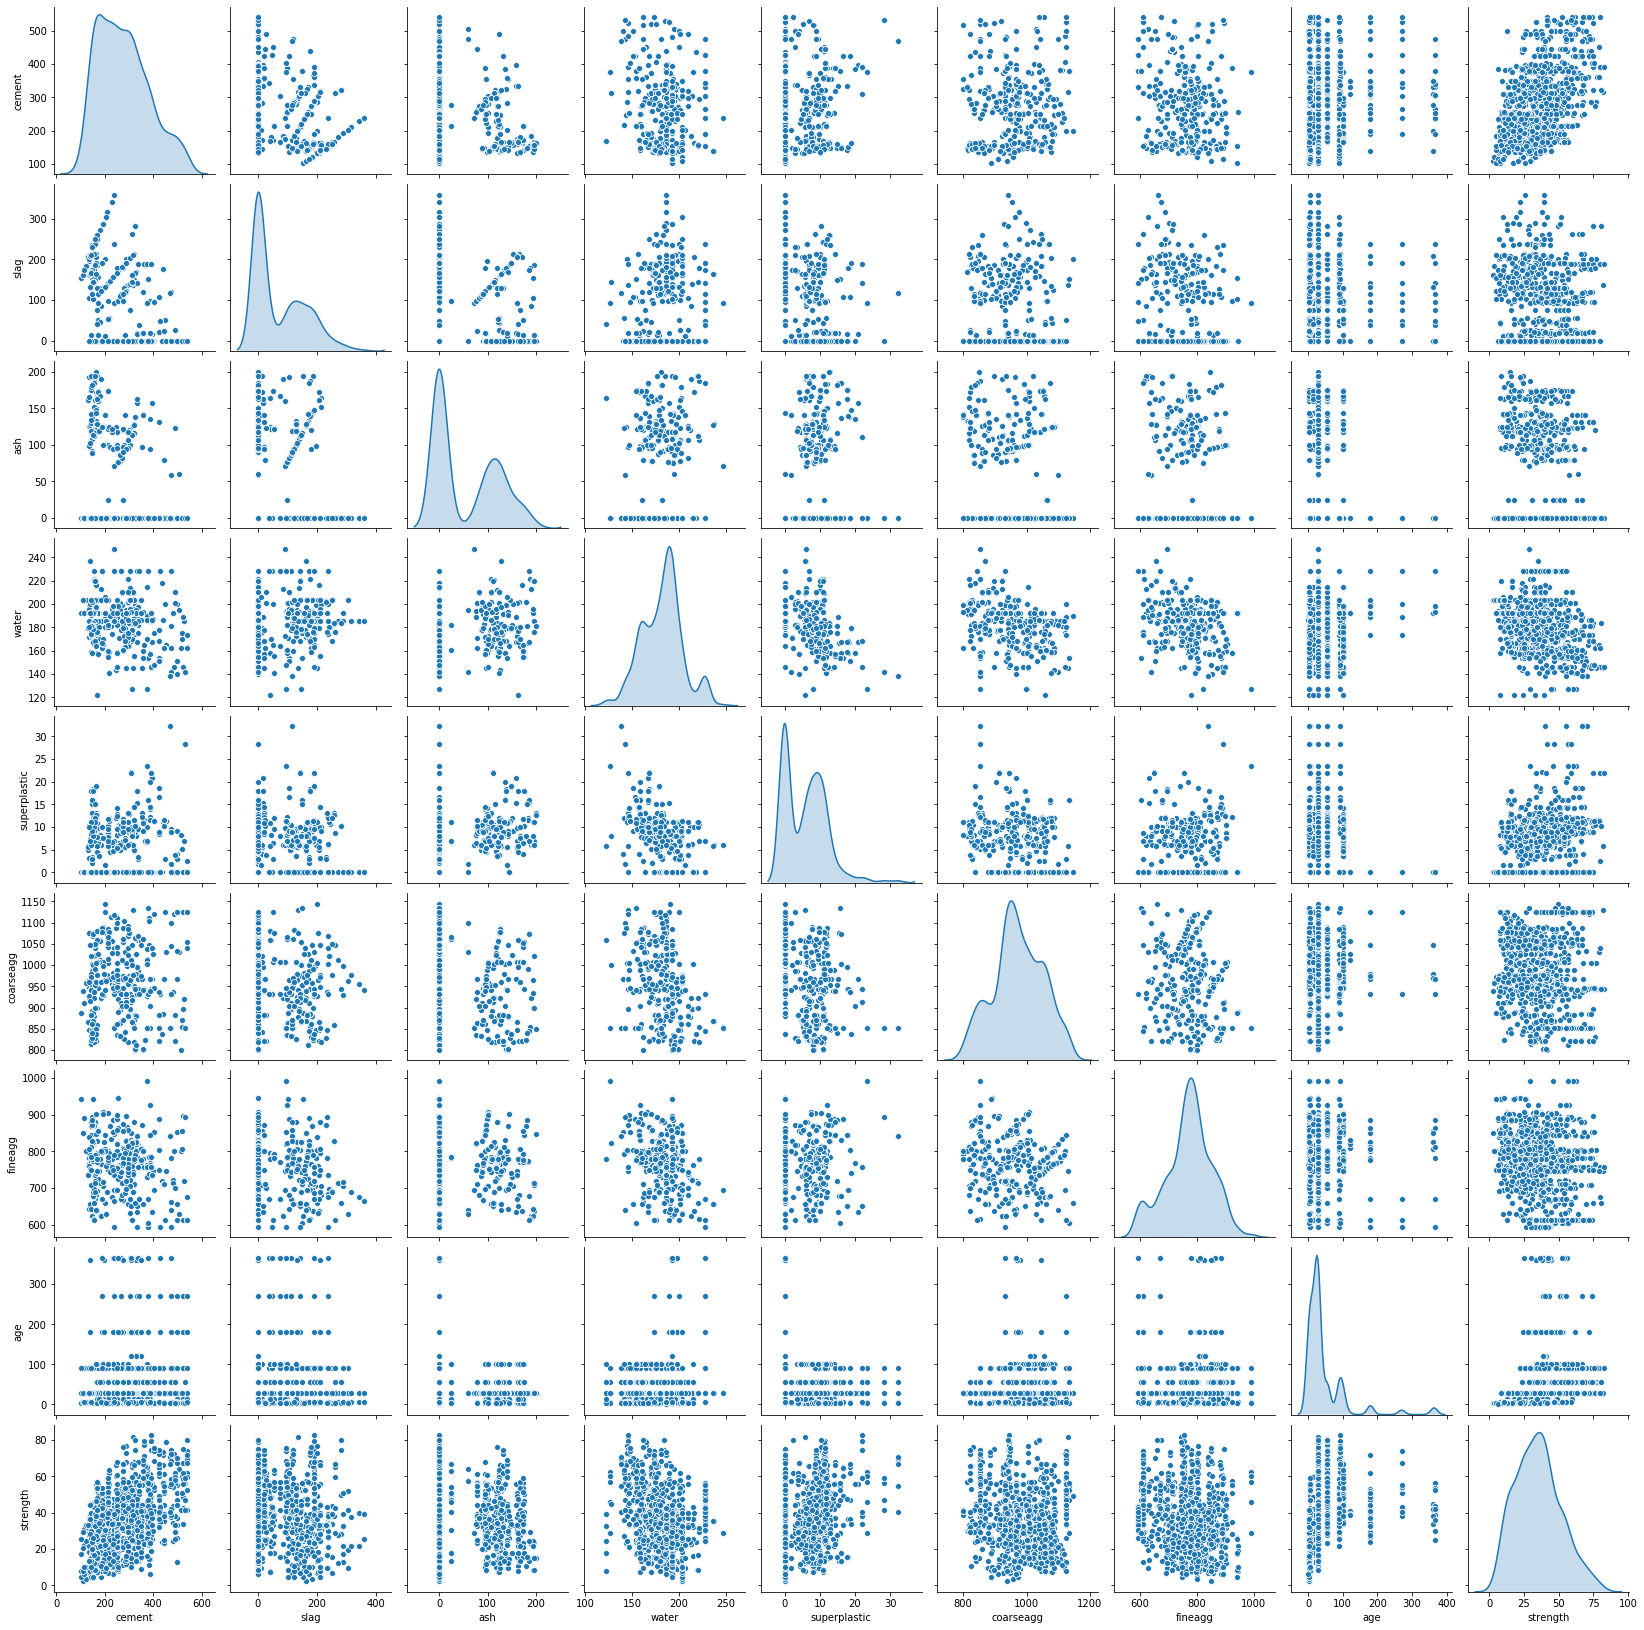

In [13]:
sns.pairplot(concrete,diag_kind = 'kde')

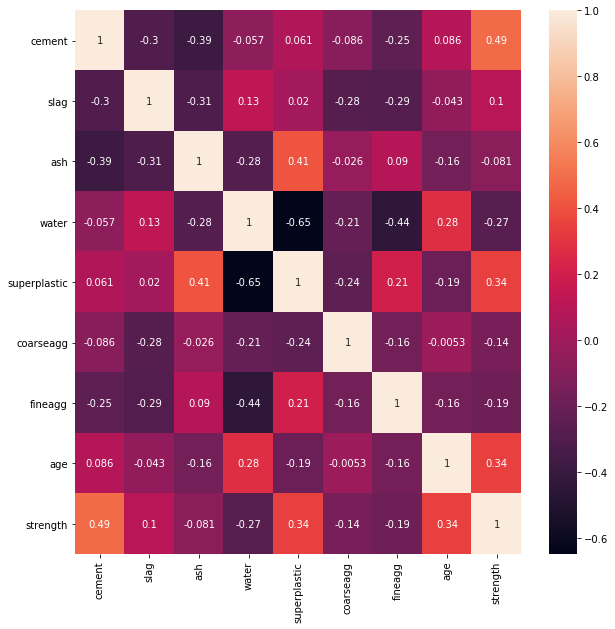

In [14]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(concrete.corr(), annot = True, ax=ax)

#lets take 0.4 as the threshold at which any corolation above it is consedered high
#############
#corolation of the target and features:
###the corolation map shows that the strength is positively and higly corrolated with the cement density, 0.49
###Also there is some moderate positive corolation between the strength and the age, and the strength and the superplastic density
###strength and water are negatively corolated (-0.27)
###according to experts all these observations are expected
#########
#other corrolations between features:
###Ash and superplastic are higly corolated 0.41, we could remove one of them. But which one? okay I think we can remove the Ash because it is less corolated to the target.
##
###cement is negatively  corolated to Ash (-0.39), also cement is negatively corolated to slag and fineaggregates -0.3 and -0.25
##
###slag and (cement,ash, coarseagg and fineagg) are negatively corolated -0.31, -0.28
##
###Ash and water are -0.28 corolated, besides all above observations with Ash
##
###water and age are positively corolated (0.28), 
###water is higly negatively corolated (-0.44) to fine aggreagates and (-0.65) to superplstic
###aggregates in general we can not remove them from the model I think because they compose 75% of the concrete mixture
###I an not remove the superplastic because it is corolated to Ash and I migh remove Ash feature

# #Linear Regression

In [15]:
#use all original features:
x_org=concrete.drop(['strength'], axis=1)
y_org=concrete[['strength']]

In [16]:
print('x_org shape',x_org.shape,'y_org shape',y_org.shape,'original data shape',concrete.shape)

x_org shape (1005, 8) y_org shape (1005, 1) original data shape (1005, 9)


In [17]:
from sklearn.model_selection import train_test_split
x_orgtrain, x_orgtest, y_orgtrain, y_orgtest = train_test_split(x_org, y_org, test_size=0.30, random_state=1)

In [18]:
print('x_orgtrain shape',x_orgtrain.shape,'y_orgtain shape',y_orgtrain.shape)
print('x_orgtest shape',x_orgtest.shape,'y_orgtest shape',y_orgtest.shape)

x_orgtrain shape (703, 8) y_orgtain shape (703, 1)
x_orgtest shape (302, 8) y_orgtest shape (302, 1)


In [19]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
LR = LinearRegression() 
LR.fit(x_orgtrain, y_orgtrain) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
for idx, col_name in enumerate(x_orgtrain.columns):
    print("The coefficient for {} is {}".format(col_name, LR.coef_[0][idx]))

The coefficient for cement is 0.13001790864764937
The coefficient for slag is 0.10892210093466248
The coefficient for ash is 0.09396745486494847
The coefficient for water is -0.12028826446915697
The coefficient for superplastic is 0.3183496395241164
The coefficient for coarseagg is 0.0230879909332276
The coefficient for fineagg is 0.03229064317676662
The coefficient for age is 0.10906711141772381


In [21]:
intercept = LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -46.49337273612008


In [22]:
#get the score R2 on train set
print('R2 of original training set Linear Regression',LR.score(x_orgtrain, y_orgtrain))

R2 of original training set Linear Regression 0.6217217238825692


In [23]:
#get the score R2 on test set
print('R2 of original test set Linear Regression',LR.score(x_orgtest, y_orgtest))

R2 of original test set Linear Regression 0.5419610271323057


In [24]:
#get y_predict from the test set
y_orgpredict = LR.predict(x_orgtest)

In [25]:
#get the mean squared error then take its root to get RMS error:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print("Root_mean_square_error of LinearRegression:", np.sqrt(mean_squared_error(y_orgtest,y_orgpredict)))

Root_mean_square_error of LinearRegression: 10.316849412941323


In [26]:
#creat a dataframe for the performance and update it with Algorithem and scores as we go
RMS=[]
R2_train=[]
R2_test=[]
Algorithem=[]
Algorithem.append('Linear Regression')
R2_train.append(LR.score(x_orgtrain, y_orgtrain))
R2_test.append(LR.score(x_orgtest, y_orgtest))
RMS.append(np.sqrt(mean_squared_error(y_orgtest,y_orgpredict)))
performance = pd.DataFrame()

# Ratio features and Ploynomial features
#here we will add ratios after checking with expaerts
#then we will add polynomail interacion terms

In [27]:
#According to experts water to cement ratio is an important factor as it gives you the paste in the concrete
#lets create a coloum of that ratio and add it to the dataset
concrete["w/cm ratio"]= concrete["water"]/concrete["cement"]
#Also we could try these ratios as Ash Slag and superpalstic are sometimes replacement to cement
concrete["ash/cm ratio"]= concrete["ash"]/concrete["cement"]
concrete["slag/cm ratio"]= concrete["slag"]/concrete["cement"]
concrete["superplastic/cm ratio"]= concrete["superplastic"]/concrete["cement"]
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/cm ratio,ash/cm ratio,slag/cm ratio,superplastic/cm ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198,0.000000,1.500354,0.000000
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241,0.735938,0.249852,0.063943
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600,0.382800,0.000000,0.022000
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143,0.000000,0.428571,0.000000
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708,0.000000,1.184755,0.058786


In [28]:
#our new x_ratio and y_ratio now:
x_ratio=concrete.drop(['strength'], axis=1)
y_ratio=concrete[['strength']]

In [29]:
#slpit them:
x_ratio_train, x_ratio_test, y_ratio_train, y_ratio_test = train_test_split(x_ratio, y_ratio, test_size=0.30, random_state=1)

In [30]:
#Add polynomial terms to x_train_ratio and call it x_ratio_poly_train
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
#create the object of polynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)

#Add poly terms to the features in x ratio_train and x ratio test produced above
x_ratio_poly_train = poly.fit_transform(x_ratio_train)
x_ratio_poly_test = poly.fit_transform(x_ratio_test)

#Apply linearRegression to the poly object
poly_clf = linear_model.LinearRegression()

#fir on the new train set obtained after adding poly to ratios
poly_clf.fit(x_ratio_poly_train, y_ratio_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#score the model on train and test (R2)
print("R2 of train set polynomial_ratio_linear regression fit:",poly_clf.score(x_ratio_poly_train, y_ratio_train))
print("R2 of test set polynomial_ratio_linear regression fit:",poly_clf.score(x_ratio_poly_test, y_ratio_test))
#get the RMS
y_ratio_poly_predict = poly_clf.predict(x_ratio_poly_test)
print("Root_mean_square_error of polynomial_ratio_linear regression fit:", np.sqrt(mean_squared_error(y_ratio_test,y_ratio_poly_predict)))

R2 of train set polynomial_ratio_linear regression fit: 0.7945305830822749
R2 of test set polynomial_ratio_linear regression fit: 0.700383429580943
Root_mean_square_error of polynomial_ratio_linear regression fit: 8.34408634874318


In [32]:
#Append the name of the Algorithem, the values of R2 and RMS to their respective lists
Algorithem.append('Linear Regression with ratio features and polynomial features')
R2_train.append(poly_clf.score(x_ratio_poly_train, y_ratio_train))
R2_test.append(poly_clf.score(x_ratio_poly_test, y_ratio_test))
RMS.append(np.sqrt(mean_squared_error(y_ratio_test,y_ratio_poly_predict)))

In [33]:
#performance["Algorithem"]=Algorithem
#performance["R2_train"]=R2_train
#performance["R2_test"]=R2_test
#performance["RMS"]=RMS
#performance

In [34]:
#When we combined polynomial features and the four extra ratio features 
#we see that the model used the following number of features
#this quite complex model that might perform well in production and unseen data
print(x_ratio_poly_train.shape, y_ratio_train.shape)

(703, 79) (703, 1)


# #Regulaization with Ridge

In [35]:
#Keep the 79 features and let Ridge reguilaze it 
from sklearn.linear_model import Ridge
RidgeReg = Ridge(alpha=0.75)
RidgeReg.fit(x_ratio_poly_train, y_ratio_train)
print ("Ridge model coef:", (RidgeReg.coef_))
print(RidgeReg.get_params)
##I want to print the names of the coef but it does not work here??
##print(x_ratio_poly_train.columns)

Ridge model coef: [[ 0.00000000e+00  6.05153622e-01  1.29923464e-01 -8.98212623e-03
   1.78123213e+00  2.80923701e+00  1.19772927e-01 -1.32930568e-01
   6.14594167e-02  3.12406188e-01 -1.69075398e+00 -5.95164032e-01
  -7.07972304e-02 -1.79588710e-04  1.98630435e-04 -3.45896441e-03
  -8.54049653e-03  8.66207035e-06  1.53611393e-04  5.48345756e-04
   1.78123213e+00 -8.98212675e-03  1.29923464e-01  2.80923701e+00
   2.67767702e-04 -1.73733475e-03 -2.71856614e-03 -1.35325875e-04
   4.24512092e-04  3.99441673e-04  4.43865745e-02 -8.66420317e-03
  -2.06304821e-02  4.60366669e-01 -3.21651474e-03 -1.79568478e-02
   1.45637887e-04  5.50846243e-04  3.75314706e-03  1.13255925e-01
   5.95722397e-02 -8.66420294e-03  1.25921462e+00  3.07485835e-02
  -1.29507203e-03 -9.85048369e-04 -1.51737468e-03 -3.85245883e-01
   1.13255925e-01  4.43865740e-02 -4.87510054e+00 -4.09341305e-03
  -1.23304738e-03 -1.36322748e-02 -4.87510054e+00  1.25921462e+00
   4.60366669e-01 -1.24674572e+01  1.77660615e-04 -1.88776

In [36]:
#score the model on train and test (R2)
print("R2 of train set Ridge fit:",RidgeReg.score(x_ratio_poly_train, y_ratio_train))
print("R2 of test set Ridge fit:",RidgeReg.score(x_ratio_poly_test, y_ratio_test))
#get the RMS
y_RidgeReg_predict = RidgeReg.predict(x_ratio_poly_test)
print("Root_mean_square_error of RidgeReg fit:", np.sqrt(mean_squared_error(y_ratio_test,y_RidgeReg_predict)))

R2 of train set Ridge fit: 0.7820480035237488
R2 of test set Ridge fit: 0.6912091406396774
Root_mean_square_error of RidgeReg fit: 8.47087149676856


In [37]:
#Append the name of the Algorithem, the values of R2 and RMS to their respective lists
Algorithem.append('Ridge LinearReg(ratio& polynomial features) alpha 0.75')
R2_train.append(RidgeReg.score(x_ratio_poly_train, y_ratio_train))
R2_test.append(RidgeReg.score(x_ratio_poly_test, y_ratio_test))
RMS.append(np.sqrt(mean_squared_error(y_ratio_test,y_RidgeReg_predict)))

In [38]:
#show them in the performance dataframe for comparisons
performance["Algorithem"]=Algorithem
performance["R2_train"]=R2_train
performance["R2_test"]=R2_test
performance["RMS"]=RMS
performance

,Algorithem,R2_train,R2_test,RMS
0,Linear Regression,0.621722,0.541961,10.316849
1,Linear Regression with ratio features and poly...,0.794531,0.700383,8.344086
2,Ridge LinearReg(ratio& polynomial features) al...,0.782048,0.691209,8.470871


##the performance of both the train and the test sets in the simple linear regression has improved when we added complexity (ratio features and Polynomial features)
##which is expected
##Note that the number of features is 79 this is quite complex
##After Ridge regularization the score of the test data has decreasd but very little compared to the reduction in complexity
##this model is expected to be more general
##lets tune the alpha in Ridge

# # Hyperparameter tuning on Ridge: one group of training validation and testing sets

In [56]:
#Regularization with aplha list:
#First: prepare an alpha list which is a hyperparameter of the Ridge:
#Second: we need to split the data into 3 sets: Training Validation and Testing
####### We can do this in two steps:
############## 1) Split the concrete dataframe into Training and Testing: 
#################Here I can use what I have splitted before, which is:
#################(x_ratio_poly_train, y_ratio_train) &(x_ratio_poly_test, y_ratio_test) using: (70:30)
############## 2) Do a second split to (x_ratio_poly_train, y_ratio_train) into Train_tune and Valid_tune
#Third: loop over alpha values to: fit on Train_tune and score on both Train_tune Valid_tune to get R2 and RMS
#Fourth: Append the scores with the alpha values in a dataframe to comapre and decide on the best alpha
Alpha= [0.001, 0.01, 0.1, 1, 10]
R2_Ridge_train=[]
R2_Ridge_valid=[]
R2_Ridge_test=[]
#RMS_Ridge_train=[]
RMS_Ridge_test=[]
#RMS_Ridge_valid=[]
x_train_tune, x_valid_tune, y_train_tune, y_valid_tune = train_test_split(x_ratio_poly_train, y_ratio_train, test_size=0.30, random_state=1)
for a in Alpha:
    RidgeReg_tune = Ridge(alpha=a)
    #print(a)
    RidgeReg_tune.fit(x_train_tune,y_train_tune)
    R2_Ridge_train.append(RidgeReg_tune.score(x_train_tune,y_train_tune))
    R2_Ridge_valid.append(RidgeReg_tune.score(x_valid_tune,y_valid_tune))
    R2_Ridge_test.append(RidgeReg_tune.score(x_ratio_poly_test, y_ratio_test))
    y_RidgeReg_tune_predict = RidgeReg_tune.predict(x_ratio_poly_test)
    RMS_Ridge_test.append(np.sqrt(mean_squared_error(y_ratio_test,y_RidgeReg_tune_predict)))      

In [57]:
Ridge_Lasso_performance = pd.DataFrame()
Ridge_Lasso_performance ["Alpah"]=Alpha
Ridge_Lasso_performance ["R2_Ridge_train"]=R2_Ridge_train
Ridge_Lasso_performance ["R2_Ridge_valid"]=R2_Ridge_valid
Ridge_Lasso_performance ["R2_Ridge_test"]=R2_Ridge_test
Ridge_Lasso_performance ["RMS_Ridge_test"]=RMS_Ridge_test
Ridge_Lasso_performance

,Alpah,R2_Ridge_train,R2_Ridge_valid,R2_Ridge_test,RMS_Ridge_test
0,0.001,0.795279,0.734211,0.655952,8.941401
1,0.010,0.787609,0.732420,0.651082,9.004458
2,0.100,0.785370,0.732647,0.651905,8.993838
3,1.000,0.783824,0.735037,0.659310,8.897650
4,10.000,0.778832,0.740425,0.670533,8.749877


##Here we that alpha = 10.0 has given the best peformance in Ridge
##Lets apply Kfold cross validation on alpha list

# Hyperparameter tuning on Ridge: Kfold¶

##join x ratio poly train and test & y ratio train and test into one data frame to apply kfold:
##Note that x ratio poly train and test are mutlidimentional numpy arrays
##And that y ratio train and test are 1 dimentional numpy array
##To join them in obe data frame we convert each one to a dataframe separetley
#df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])
df1=pd.DataFrame(data=x_ratio_poly_train)
df2=pd.DataFrame(data=x_ratio_poly_test)
df3=pd.DataFrame(data=y_ratio_train)
df4=pd.DataFrame(data=y_ratio_test)
#df4
##Now we add df1,df2,df3,and df4 together: I have to check wether to use (merge,join or contact)

#concat works with df1 and df2 to create unified x dataframe## e.g pd.concat([df7,df8],axis=0,sort=False)
DF_ratio_poly=pd.concat([df1,df2],axis=0,sort=False)
print(DF_ratio_poly.shape)

#concat works with df3 and df4 to create unified y dataframe## e.g pd.concat([df7,df8],axis=0,sort=False)
df5=pd.concat([df3,df4],axis=0,sort=False)
print(df5.shape)

#Join the above two dataframes of both x and y ## e.g df9.join(df10,how='right')

DFAll=DF_ratio_poly.join(df5,how='outer')

##Make sure that you get the expected shape : 1005 rows and 80 cols
#check you get back the datasize you expect
print(DFAll.shape)
DFAll.head()



In [58]:
#stratigey for Kfold cross validation
#start with concrete datset that has the ratio features X and Y
#generate outer Kfold sets on X and Y
#loop over them using the index of each fold
#loop over the alpha parameter
#generate inner Kfold for each fold from above
#apply pipeline of [poly - fit with alpha on inner train- score on validation- store the score in alist
#find the mean of the score list for that alpha
#store the mean score of each alpha 
#choose the alpha with the best score
#apply this alpha model on test

In [59]:
print(concrete.columns)
concrete.head()

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'w/cm ratio', 'ash/cm ratio',
       'slag/cm ratio', 'superplastic/cm ratio'],
      dtype='object')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/cm ratio,ash/cm ratio,slag/cm ratio,superplastic/cm ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198,0.000000,1.500354,0.000000
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241,0.735938,0.249852,0.063943
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600,0.382800,0.000000,0.022000
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143,0.000000,0.428571,0.000000
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708,0.000000,1.184755,0.058786


In [60]:
from sklearn.model_selection import KFold#we must pass X and Y as arrays in Kfold not as dataframes
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
print(concrete.shape)
#we use the x_ratio and y_ratio as our X and Y, we conver them to numpy arrays
x_ratio_CV=x_ratio.to_numpy() #this will be passed into Kfold
print(x_ratio_CV.shape)
y_ratio_CV=y_ratio.to_numpy()#this will be passed into Kfold
print(y_ratio_CV.shape)
num_folds = 2
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed)
#print(kfold)
import warnings
warnings.filterwarnings('ignore')
AAA=[]
inner_validation_score=[]
inner_validation_score_mean=[]
for train_index, test_index in kfold.split(x_ratio_CV):
    #print('\n',"TRAIN_OUT CV indices:", train_index,'\n \n', "TEST CV  indices:", test_index,'\n')
    x_train_out, x_test = x_ratio_CV[train_index], x_ratio_CV[test_index]
    y_train_out, y_test = y_ratio_CV[train_index], y_ratio_CV[test_index]
    #print(len(x_train_out))
    #print(x_train_out)
    for a in Alpha:
        for train_index, test_index in kfold.split(x_train_out):
            x_train_in, x_valid = x_train_out[train_index], x_train_out[test_index]
            y_train_in, y_valid = y_train_out[train_index], y_train_out[test_index]
            poly_Ridge_model = make_pipeline(PolynomialFeatures(degree=2,interaction_only=True),Ridge(alpha=a))
            poly_Ridge_model.fit(x_train_in, y_train_in)
            poly_Ridge_model.score(x_valid, y_valid)
            AAA.append(a)
            inner_validation_score.append(poly_Ridge_model.score(x_valid, y_valid))
        #print(AAA)
        #print(inner_validation_score)
        #print(np.mean(inner_valid_score))
        inner_validation_score_mean.append(np.mean(inner_validation_score))  
        print(inner_validation_score_mean)
        print('max validation score of alpha =',a,'is',np.amax(inner_validation_score_mean)) 
        AAA=[] 
        inner_validation_score=[]
    inner_validation_score_mean=[] 
    print('next set')
##the best performance on the two validation sets above is for alpha=10.0 in the two times
##we use it now:
alpha=10.0
##fit the model and score it now on the tarin_out sets
poly_Ridge_model.fit(x_train_out,y_train_out)
poly_Ridge_model.score(x_train_out,y_train_out)
##score the model on the test sets
poly_Ridge_model.score(x_test,y_test)
print('\n')
print('RidgeRig score on outer train set Kfold',num_folds,'=',poly_Ridge_model.score(x_train_out,y_train_out),'\n','RidgeRig score on test set Kfold',num_folds,'=',poly_Ridge_model.score(x_test,y_test))

(1005, 13)
(1005, 12)
(1005, 1)
[0.6708622144762698]
max validation score of alpha = 0.001 is 0.6708622144762698
[0.6708622144762698, 0.6717651414770655]
max validation score of alpha = 0.01 is 0.6717651414770655
[0.6708622144762698, 0.6717651414770655, 0.6768633654056202]
max validation score of alpha = 0.1 is 0.6768633654056202
[0.6708622144762698, 0.6717651414770655, 0.6768633654056202, 0.6839609667575329]
max validation score of alpha = 1 is 0.6839609667575329
[0.6708622144762698, 0.6717651414770655, 0.6768633654056202, 0.6839609667575329, 0.6927999165306068]
max validation score of alpha = 10 is 0.6927999165306068
next set
[0.4849639038017184]
max validation score of alpha = 0.001 is 0.4849639038017184
[0.4849639038017184, 0.4870403787767753]
max validation score of alpha = 0.01 is 0.4870403787767753
[0.4849639038017184, 0.4870403787767753, 0.4967289505478335]
max validation score of alpha = 0.1 is 0.4967289505478335
[0.4849639038017184, 0.4870403787767753, 0.4967289505478335, 0.5

##Note that alpha= 10 shows the best performance in the validation sets
##Also, note that the Kfold method shows better perfornce in the test 0.7108415013284188 compared to the 0.670533 test performance when we used only one group of train validate test

##Doing Lasso the same way as we did Ridge might give a better performance, I could do it later

# #Descision Tree Regressor for numeriacal values

In [130]:
#Basic Decision tree
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor( criterion = 'mse', random_state=1) 
#I am using the whole 79 feature I generated previously after adding ratios and polynomaial interactions
dtr.fit(x_ratio_poly_train, y_ratio_train) 
y_pred_dtr = dtr.predict(x_ratio_poly_test)
print("R2 of train set polynomial_ratio_Decision tree fit:",dtr.score(x_ratio_poly_train, y_ratio_train))#R2 score
print("R2 of test set polynomial_ratio_Decision tree fit:",dtr.score(x_ratio_poly_test, y_ratio_test))
print('Root_mean_square_error of polynomial_ratio_Decision tree fit:',np.sqrt(mean_squared_error(y_ratio_test, y_pred_dtr)))

R2 of train set polynomial_ratio_Decision tree fit: 0.9959463679857883
R2 of test set polynomial_ratio_Decision tree fit: 0.7823883867991254
Root_mean_square_error of polynomial_ratio_Decision tree fit: 7.11110202634342


##The score of the train set is very high, overfit, needs regualrization
##But lets look at the imprtant features first

# # Feature selection

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00319
Feature: 2, Score: 0.00221
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01058
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.00922
Feature: 7, Score: 0.00480
Feature: 8, Score: 0.00016
Feature: 9, Score: 0.00545
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00018
Feature: 12, Score: 0.00007
Feature: 13, Score: 0.02094
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00019
Feature: 16, Score: 0.00472
Feature: 17, Score: 0.02253
Feature: 18, Score: 0.00034
Feature: 19, Score: 0.52973
Feature: 20, Score: 0.00050
Feature: 21, Score: 0.00021
Feature: 22, Score: 0.00028
Feature: 23, Score: 0.00308
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00017
Feature: 26, Score: 0.03464
Feature: 27, Score: 0.00036
Feature: 28, Score: 0.00082
Feature: 29, Score: 0.02966
Feature: 30, Score: 0.00021
Feature: 31, Score: 0.00002
Feature: 32, Score: 0.00082
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00375
Feature: 35, Score: 0.00005
Fe

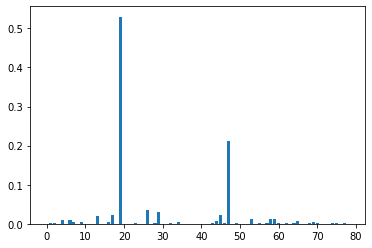

In [131]:
# get importance
importance_dtr = dtr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_dtr):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_dtr))], importance_dtr)
plt.show()

##this shows that from 79 features the most important are around 7 features
##Imprtant Feature numbers are: 19, then 47, 26, 29,45, 17,13
##lets repeat this feature importance but with only ratio features (no polynomial features to get sense of the feature meaning)

In [133]:
##Here use the split of the data after adding ratio features only no polynomial features
dtr_ratio = DecisionTreeRegressor( criterion = 'mse', random_state=1) 
dtr_ratio.fit(x_ratio_train, y_ratio_train) 
y_pred_dtr_ratio = dtr_ratio.predict(x_ratio_test)
print("R2 of train set ratio_Decision tree fit:",dtr_ratio.score(x_ratio_train, y_ratio_train))#R2 score
print("R2 of test set ratio_Decision tree fit:",dtr_ratio.score(x_ratio_test, y_ratio_test))
print('Root_mean_square_error of ratio_Decision tree fit:',np.sqrt(mean_squared_error(y_ratio_test, y_pred_dtr_ratio)))

R2 of train set ratio_Decision tree fit: 0.9959463679857883
R2 of test set ratio_Decision tree fit: 0.7602995350104128
Root_mean_square_error of ratio_Decision tree fit: 7.4632899391846985


##still high performance on train set(overfit)

Feature: 0, Score: 0.01779
Feature: 1, Score: 0.06053
Feature: 2, Score: 0.01200
Feature: 3, Score: 0.01616
Feature: 4, Score: 0.02962
Feature: 5, Score: 0.01695
Feature: 6, Score: 0.03074
Feature: 7, Score: 0.32878
Feature: 8, Score: 0.41947
Feature: 9, Score: 0.00316
Feature: 10, Score: 0.03803
Feature: 11, Score: 0.02677


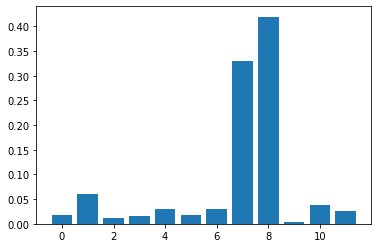

In [134]:
 #get importance
importance_dtr_ratio = dtr_ratio.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_dtr_ratio):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_dtr_ratio))], importance_dtr_ratio)
plt.show()

In [135]:
x_ratio.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'w/cm ratio', 'ash/cm ratio', 'slag/cm ratio',
       'superplastic/cm ratio'],
      dtype='object')

#This shows that the most important four important features are: w/cm ratio, then the age, the slag density, lastly the slag/cm ratio
#to implement only these 4 features we need to re fit the model with these features only and rescore it on the test set

# #Regularized DT (hyper parameter tuning) using one group of train validate and test sets

In [136]:
MaxDepth= [1, 2, 3, 4,5,6,7,8,9,10]
R2_dtr_train=[]
R2_dtr_valid=[]
R2_dtr_test=[]
RMS_dtr_test=[]
x_train_tunedtr, x_valid_tunedtr, y_train_tunedtr, y_valid_tunedtr = train_test_split(x_ratio_train, y_ratio_train, test_size=0.30, random_state=1)
for m in MaxDepth:
    dtr_tune =  DecisionTreeRegressor( criterion = 'mse', random_state=1,max_depth=m) 
    print(m)
    dtr_tune.fit(x_train_tunedtr,y_train_tunedtr)
    R2_dtr_train.append(dtr_tune.score(x_train_tunedtr,y_train_tunedtr))
    R2_dtr_valid.append(dtr_tune.score(x_valid_tunedtr,y_valid_tune))
    R2_dtr_test.append(dtr_tune.score(x_ratio_test, y_ratio_test))
    y_dtr_tune_predict = dtr_tune.predict(x_ratio_test)
    RMS_dtr_test.append(np.sqrt(mean_squared_error(y_ratio_test,y_dtr_tune_predict)))    

1
2
3
4
5
6
7
8
9
10


In [137]:
dtr_performance = pd.DataFrame()
dtr_performance ["max depth"]=MaxDepth
dtr_performance ["R2_dtr_train"]=R2_dtr_train
dtr_performance ["R2_dtr_valid"]=R2_dtr_valid
dtr_performance ["R2_dtr_test"]=R2_dtr_test
dtr_performance ["RMS_dtr_test"]=RMS_dtr_test
dtr_performance

,max depth,R2_dtr_train,R2_dtr_valid,R2_dtr_test,RMS_dtr_test
0,1,0.256040,0.270205,0.245267,13.243189
1,2,0.511704,0.577202,0.460622,11.195476
2,3,0.656018,0.653575,0.553278,10.188597
3,4,0.759498,0.737612,0.635592,9.202164
4,5,0.828020,0.781013,0.729258,7.931839
5,6,0.892421,0.829018,0.755446,7.538468
6,7,0.936414,0.787599,0.729477,7.928627
7,8,0.963666,0.811016,0.744986,7.698006
8,9,0.978948,0.812240,0.734573,7.853595
9,10,0.986924,0.828436,0.739766,7.776381


#max depth = 6.0 gave the highest score in the test set and the validate set

# # Hyperparameter tuning in DT using RandomSearch:

In [138]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3,6,9],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["mse", "friedman_mse"]}

In [139]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(DecisionTreeRegressor(random_state=1) , param_distributions=param_dist, n_iter=samples)
randomCV.fit(x_ratio_train, y_ratio_train)
print("R2 of train set randomCV_Decision tree fit:",randomCV.score(x_ratio_train, y_ratio_train))
print("R2 of test set randomCV_Decision tree fit:",randomCV.score(x_ratio_test, y_ratio_test))
y_pred_dtr_randomCV = randomCV.predict(x_ratio_test)
print('Root_mean_square_error of ratio_Decision tree fit:',np.sqrt(mean_squared_error(y_ratio_test, y_pred_dtr_randomCV)))
print('randomserch best parameters for DT',randomCV.best_params_)

R2 of train set randomCV_Decision tree fit: 0.9205666811827196
R2 of test set randomCV_Decision tree fit: 0.8042658010805426
Root_mean_square_error of ratio_Decision tree fit: 6.744181225190158
randomserch best parameters for DT {'criterion': 'mse', 'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}


#the result I got from decision tree above without this randomCV looks better at the max depth 6
#Maybe the GridSearch improve this result

# # Random forest Regressor

In [140]:
##Here use the split of the data after adding ratio features only
from sklearn.ensemble import RandomForestRegressor
RF_ratio = RandomForestRegressor( criterion = 'mse', random_state=1) 
RF_ratio.fit(x_ratio_train, y_ratio_train) 
y_pred_RF_ratio = RF_ratio.predict(x_ratio_test)
print("R2 of train set ratio_random forest fit:",RF_ratio.score(x_ratio_train, y_ratio_train))#R2 score
print("R2 of test set ratio_random forest fit:",RF_ratio.score(x_ratio_test, y_ratio_test))
print('Root_mean_square_error of ratio_random forest fit:',np.sqrt(mean_squared_error(y_ratio_test, y_pred_RF_ratio)))

R2 of train set ratio_random forest fit: 0.9845108150692122
R2 of test set ratio_random forest fit: 0.8916230240673831
Root_mean_square_error of ratio_random forest fit: 5.0183897765425405


# # Features selection

Feature: 0, Score: 0.04502
Feature: 1, Score: 0.05761
Feature: 2, Score: 0.00766
Feature: 3, Score: 0.02917
Feature: 4, Score: 0.02731
Feature: 5, Score: 0.02644
Feature: 6, Score: 0.03413
Feature: 7, Score: 0.34704
Feature: 8, Score: 0.37557
Feature: 9, Score: 0.00868
Feature: 10, Score: 0.02782
Feature: 11, Score: 0.01356


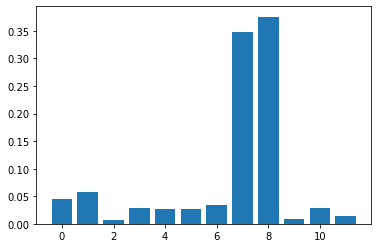

In [141]:
 #get importance
importance_RF_ratio = RF_ratio.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_RF_ratio):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF_ratio))], importance_RF_ratio)
plt.show()

In [142]:
x_ratio.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'w/cm ratio', 'ash/cm ratio', 'slag/cm ratio',
       'superplastic/cm ratio'],
      dtype='object')

#Again, quite similar to the feature importance in the decision Tree above:
#The plot shows that the most important five features are: w/cm ratio, then the age, the slag density,then the cement density,and lastly the fineagg density
#Not sure if I have to refit and rescore again using these features only

# Hyperparameter tuning in RF using GridSearch

In [143]:
from sklearn.model_selection import GridSearchCV
param_dist_RF = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

In [128]:
grid_search= RandomizedSearchCV(RandomForestRegressor(random_state=1) , param_distributions=param_dist)
grid_search.fit(x_ratio_train, y_ratio_train)
print("R2 of train set grid_search_random forest fit:",grid_search.score(x_ratio_train, y_ratio_train))
print("R2 of test set grid_search_random forest fit:",grid_search.score(x_ratio_test, y_ratio_test))
y_pred_RF_grid_search = grid_search.predict(x_ratio_test)
print('Root_mean_square_error of grid_search_random forestfit:',np.sqrt(mean_squared_error(y_ratio_test, y_pred_RF_grid_search)))
print('grid_search_best parameters for DT',grid_search.best_params_)

R2 of train set grid_search_random forest fit: 0.9730333785393811
R2 of test set grid_search_random forest fit: 0.8858261880508798
Root_mean_square_error of grid_search_random forestfit: 5.150852648047744
grid_search_best parameters for DT {'criterion': 'friedman_mse', 'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}


#this score for the train is very high, we need more optimization.
#I think I have to re-fit the data with the most important features first and then tune the hyperparameter?

#I also need to re implement cross_val with Kfold in a cleaner or better way than I did above
#Also not sure if it is important to scale data here
#Also I dont see we have outliers here even in age because all values are real.
#Getting the feedback is extremely critical for this project